In [1]:
import numpy as np
import pandas as pd
import math

In [9]:
from sklearn import linear_model

In [2]:
def polynomial_dframe(feature, degree):
    poly_dframe = pd.DataFrame()
    poly_dframe['power_1'] = feature
    for power in range(2, degree + 1):
        name = 'power_' + str(power)
        poly_dframe[name] = feature.astype(np.float64) ** power
        
    return poly_dframe

In [4]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

In [5]:
sales.sort_values(['sqft_living', 'price'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19452,3980300371,20140926T000000,142000.0,0.0,0.00,290.0,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
15381,2856101479,20140701T000000,276000.0,1.0,0.75,370.0,1801,1.0,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
860,1723049033,20140620T000000,245000.0,1.0,0.75,380.0,15000,1.0,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
18379,1222029077,20141029T000000,265000.0,0.0,0.75,384.0,213444,1.0,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4868,6896300380,20141002T000000,228000.0,0.0,1.00,390.0,5900,1.0,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0
21332,9266700190,20150511T000000,245000.0,1.0,1.00,390.0,2000,1.0,0,0,...,6,390,0,1920,0,98103,47.6938,-122.347,1340.0,5100.0
8623,6303400395,20150130T000000,325000.0,1.0,0.75,410.0,8636,1.0,0,0,...,4,410,0,1953,0,98146,47.5077,-122.357,1190.0,8636.0
11500,4322200105,20150331T000000,229050.0,1.0,1.00,420.0,3298,1.0,0,0,...,4,420,0,1949,0,98136,47.5375,-122.391,1460.0,4975.0
14466,7549801385,20140612T000000,280000.0,1.0,0.75,420.0,6720,1.0,0,0,...,5,420,0,1922,0,98108,47.5520,-122.311,1420.0,6720.0
465,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0


In [6]:
l2_small_penalty = 1.5e-5

In [7]:
poly_features_15 = polynomial_dframe(sales['price'], 15)

In [10]:
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)

In [11]:
model.fit(poly_features_15, sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [12]:
model.coef_

array([ 9.98707830e-01,  1.73426497e-09, -8.35733793e-16,  1.32341720e-22,
        2.81957347e-30, -9.90075952e-37, -1.24615601e-43, -6.14361208e-51,
        4.46329325e-58,  1.49323822e-64,  2.14975129e-71,  2.07643113e-78,
        9.31102331e-86, -1.66762420e-92, -6.17346213e-99])

In [14]:
poly_features_15.head(n=1)

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15
0,221900.0,4.923961e+10,1.092627e+16,2.424539e+21,5.380052e+26,1.193834e+32,2.649117e+37,5.878390e+42,1.304415e+48,2.894496e+53,6.422888e+58,1.425239e+64,3.162605e+69,7.017820e+74,1.557254e+80


### What's the learned value for the coefficient of feature power_1

In [96]:
print("%.2f" % model.coef_[0])

1.00


## Observe Overfitting

In [17]:
# dtype_dict same as above
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [18]:
l2_small_penalty=1e-9

In [19]:
import matplotlib.pyplot as plt

In [49]:
def explore_data_set(dataset, l2_penalty):
    cur_ridge_model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
    cur_poly_features_15 = polynomial_dframe(dataset['sqft_living'], 15)
    
    cur_ridge_model.fit(cur_poly_features_15, dataset['price'])
    predicted_output = cur_ridge_model.predict(cur_poly_features_15)
    plt.plot(cur_poly_features_15['power_1'], dataset['price'], '.',
              cur_poly_features_15['power_1'], predicted_output, '-'
             )
    return cur_ridge_model.coef_
    

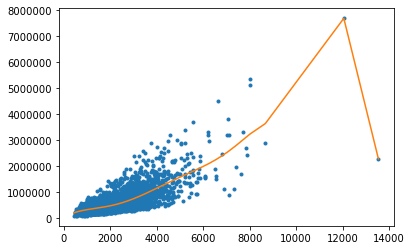

In [50]:
coef1 = explore_data_set(set_1, l2_small_penalty)

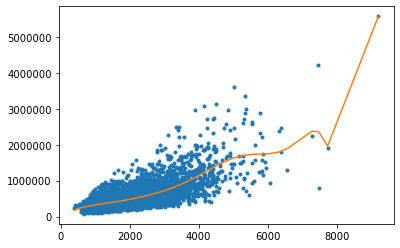

In [51]:
coef2 = explore_data_set(set_2, l2_small_penalty)

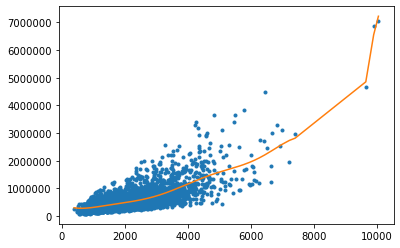

In [52]:
coef3 = explore_data_set(set_3, l2_small_penalty)

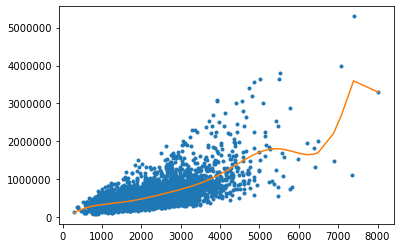

In [53]:
coef4 = explore_data_set(set_4, l2_small_penalty)

In [54]:
coef1

array([ 5.44669390e+02, -3.55447596e-01,  1.22446377e-04, -1.17175304e-08,
       -3.90512552e-13, -1.39076300e-17,  1.47860302e-20,  6.87491793e-25,
       -7.57203876e-29, -1.04097307e-32, -3.71844272e-37,  3.39989319e-41,
        5.56592092e-45,  2.53761405e-49, -3.35152940e-53])

### For the models learned in each of these training sets, what are the smallest and largest values you learne for the coef of feature power_1

In [55]:
min(coef1[0], coef2[0], coef3[0], coef4[0])

-755.3959047401938

In [56]:
max(coef1[0], coef2[0], coef3[0], coef4[0])

1119.4457483861213

### Ridge regression comes to rescue

In [58]:
l2_large_penalty = 1.23e2

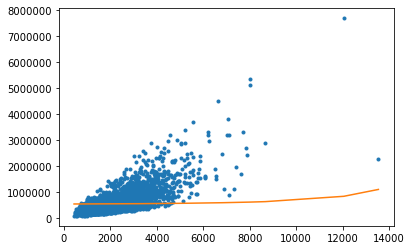

In [59]:
coef_large_1 = explore_data_set(set_1, l2_large_penalty)

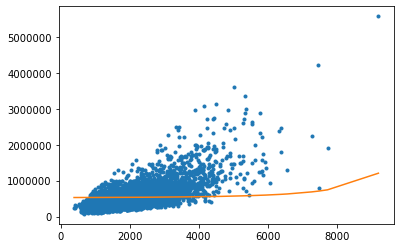

In [60]:
coef_large_2 = explore_data_set(set_2, l2_large_penalty)

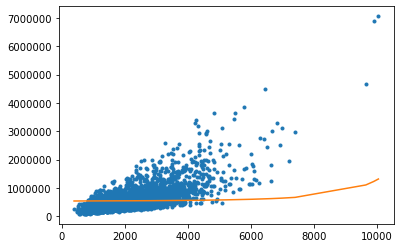

In [61]:
coef_large_3 = explore_data_set(set_3, l2_large_penalty)

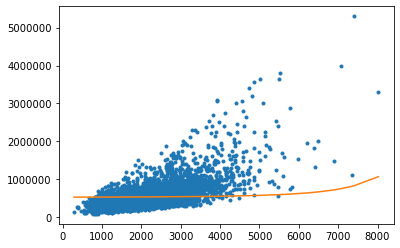

In [62]:
coef_large_4 = explore_data_set(set_4, l2_large_penalty)

### QUIZ QUESTION: For the models learned with regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?

In [97]:
print("%.2f" % min(coef_large_1[0], coef_large_2[0], coef_large_3[0], coef_large_4[0]))

2.09


In [98]:
print("%.2f" % max(coef_large_1[0], coef_large_2[0], coef_large_3[0], coef_large_4[0]))

2.33


## Select an L2 penalty via cross-validation

In [65]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', 
                                  dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [116]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    l = len(data)
    sum_rss = 0.0
    for i in range(k):
        start, end = (int) (i*l/k), (int) ((i+1)*l/k)
        
        validation_set = data[start : end]
        output_validation_set = output[start : end]
        
        train_set = data[0: start].append(data[end:l])
        output_train_set = output[0:start].append(output[end:l])
        
        cur_model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        cur_model.fit(train_set, output_train_set)
        
        predict_valid_set = cur_model.predict(validation_set)
        errors = output_validation_set - predict_valid_set
      
        rss = np.sum(errors * errors)
#         print("i = %d, [%d - %d) - rss = %.0f" % (i, start, end, rss))
        sum_rss += rss
    
    return sum_rss / k
        

In [117]:
output = train_valid_shuffled['price']
features_15 = polynomial_dframe(train_valid_shuffled['sqft_living'], 15)
l2_penalty = 1e3
k=10

In [118]:
mrss = k_fold_cross_validation(k, l2_penalty, features_15, output)
print ("mean rss: %d" % mrss)

mean rss: 264977361036975


In [119]:
Quiz Question: What is the best value for the L2 penalty according to 10-fold validation?

Object `validation` not found.


### Quiz Question: What is the best value for the L2 penalty according to 10-fold validation

### Quiz Question: What is the best value for the L2 penalty according to 10-fold validation

## Quiz Question: What is the best value for the L2 penalty according to 10-fold validation

In [134]:
k_fold = 10
min_error = None
best_l2_penalty = None
power = 3.0

while power < 9.5:
    l2_penalty = math.pow(10, power)
    avg_valid_error = k_fold_cross_validation(k_fold, l2_penalty, features_15, output)
    print ("l2_penalty = %s, mrss = %s" % (l2_penalty, avg_valid_error))
    if (min_error == None or min_error > avg_valid_error):
        best_l2_penalty = l2_penalty
        min_error = avg_valid_error
    power += 0.5

print ("Result: best l2_penalty = %s, min_error = %s" %  (best_l2_penalty, min_error))

l2_penalty = 1000.0, mrss = 264977361036975.94
l2_penalty = 3162.2776601683795, mrss = 265692935858318.25
l2_penalty = 10000.0, mrss = 265924368957215.66
l2_penalty = 31622.776601683792, mrss = 265998081509342.66
l2_penalty = 100000.0, mrss = 266021444553980.5
l2_penalty = 316227.7660168379, mrss = 266028837918724.5
l2_penalty = 1000000.0, mrss = 266031176438467.9
l2_penalty = 3162277.6601683795, mrss = 266031915996607.4
l2_penalty = 10000000.0, mrss = 266032149870752.5
l2_penalty = 31622776.60168379, mrss = 266032223828783.66
l2_penalty = 100000000.0, mrss = 266032247216419.84
l2_penalty = 316227766.01683795, mrss = 266032254612245.16
l2_penalty = 1000000000.0, mrss = 266032256951011.06
Result: best l2_penalty = 1000.0, min_error = 264977361036975.94


In [135]:
best_lr_model = linear_model.Ridge(alpha=best_l2_penalty, normalize=True)
best_lr_model.fit(features_15, train_valid_shuffled['price'])

Ridge(alpha=1000.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [136]:
test_poly_features_15 = polynomial_dframe(test['sqft_living'], 15)

In [137]:
predict_test = best_lr_model.predict(test_poly_features_15)

## Quiz Question: Using the best L2 penalty found above, train a model using all training data. What is the RSS on the TEST data of the model you learn with this L2 penalty?

In [138]:
test_errors = test['price'] - predict_test
test_rss = np.sum(test_errors * test_errors)
print (test_rss)

283856861224150.9
